In [16]:

import imgaug as ia
ia.seed(1)
# imgaug uses matplotlib backend for displaying images
%matplotlib inline
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa 
# imageio library will be used for image input/output
import imageio
import pandas as pd
import numpy as np
import re
import os
import glob
# this library is needed to read XML files for converting it into CSV
import xml.etree.ElementTree as ET
import shutil
from PIL import Image

# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from PIL import Image
 
img_width, img_height = 256, 256

plt.rcParams['figure.figsize'] = [10,5]

In [2]:
# Loading all the Images

# Accept Images

# load images as NumPy arrays and append them to images list
acc_images = []
for index, file in enumerate(glob.glob('C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Accept_Images\\*.jpg')):
    acc_images.append(imageio.imread(file))
    
# how many images we have
print('We have {} images'.format(len(acc_images)))

We have 278 images


In [3]:
# what are the sizes of the images
for index, file in enumerate(glob.glob('C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Accept_Images\\*.jpg')):
    print('Image {} have size of {}'.format(file[7:], acc_images[index].shape))

Image s\nabhishe\MITC_Project\reinforced_images5\Accept_Images\Accapted -20..jpg have size of (2116, 2652)
Image s\nabhishe\MITC_Project\reinforced_images5\Accept_Images\Accept-A26491-001-Sample - 116-1...jpg have size of (1146, 1413)
Image s\nabhishe\MITC_Project\reinforced_images5\Accept_Images\Accept-A26491-001-Sample - 118-2...jpg have size of (1141, 1413)
Image s\nabhishe\MITC_Project\reinforced_images5\Accept_Images\Accept-A26491-001-Sample - 120-1...jpg have size of (1142, 1405)
Image s\nabhishe\MITC_Project\reinforced_images5\Accept_Images\Accept-A26491-001-Sample - 121-1...jpg have size of (1140, 1412)
Image s\nabhishe\MITC_Project\reinforced_images5\Accept_Images\Accept-A26491-001-Sample - 121-2...jpg have size of (1134, 1411)
Image s\nabhishe\MITC_Project\reinforced_images5\Accept_Images\Accept-A26491-001-Sample - 123-1...jpg have size of (1136, 1418)
Image s\nabhishe\MITC_Project\reinforced_images5\Accept_Images\Accept-A26491-001-Sample - 124-1...jpg have size of (1144, 142

In [4]:
# Loading all the Images

# Reject Images

# load images as NumPy arrays and append them to images list
reject_images = []
for index, file in enumerate(glob.glob('C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Reject_Images\\*.jpg')):
    reject_images.append(imageio.imread(file))
    
# how many images we have
print('We have {} images'.format(len(reject_images)))

We have 242 images


In [5]:
# what are the sizes of the images
for index, file in enumerate(glob.glob('C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Reject_Images\\*.jpg')):
    print('Image {} have size of {}'.format(file[7:], reject_images[index].shape))

Image s\nabhishe\MITC_Project\reinforced_images5\Reject_Images\Accept-A26491-001-Sample-105-1..jpg have size of (1113, 1383)
Image s\nabhishe\MITC_Project\reinforced_images5\Reject_Images\Accept-A26491-001-Sample-108-1..jpg have size of (1123, 1377)
Image s\nabhishe\MITC_Project\reinforced_images5\Reject_Images\Accept-A26491-001-Sample-113-1..jpg have size of (1104, 1382)
Image s\nabhishe\MITC_Project\reinforced_images5\Reject_Images\Accept-A26491-001-Sample-49-1..jpg have size of (1142, 1405)
Image s\nabhishe\MITC_Project\reinforced_images5\Reject_Images\Accept-A26491-001-Sample-67-1..jpg have size of (1053, 1304)
Image s\nabhishe\MITC_Project\reinforced_images5\Reject_Images\Accept-A26491-001-Sample-75-1..jpg have size of (1137, 1409)
Image s\nabhishe\MITC_Project\reinforced_images5\Reject_Images\Accept-A26491-001-Sample-75-2..jpg have size of (1135, 1408)
Image s\nabhishe\MITC_Project\reinforced_images5\Reject_Images\Accept-A26491-001-Sample-85-1..jpg have size of (1143, 1409)
Image

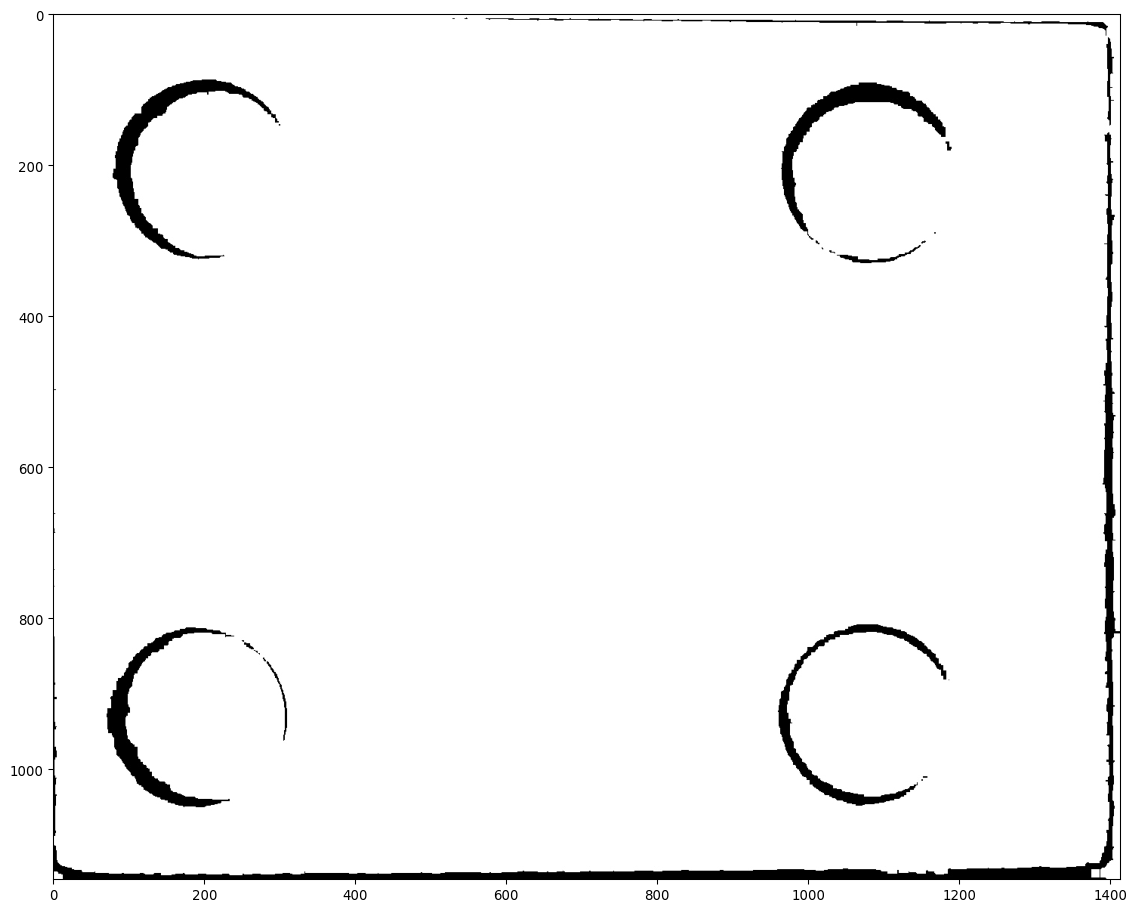

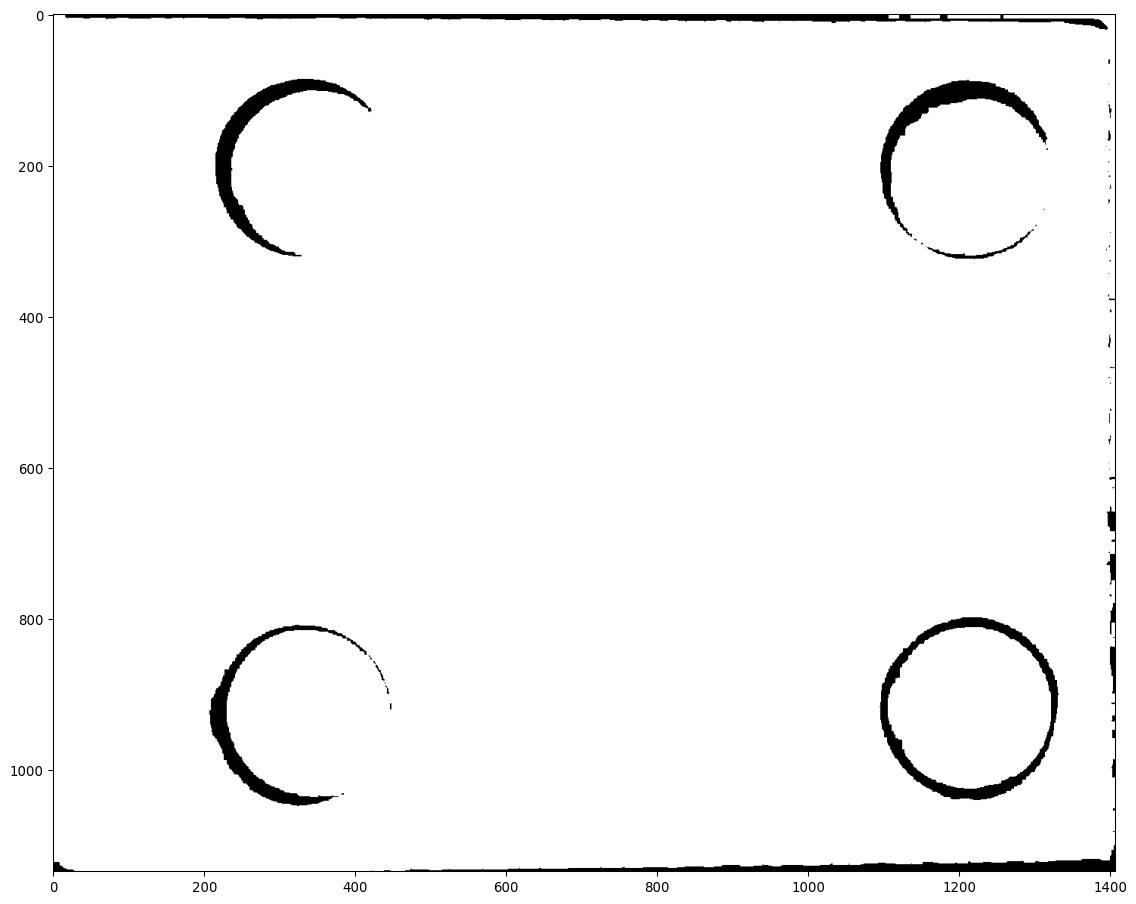

In [17]:
# Have a loook at 2 smaller images
ia.imshow(acc_images[1])
ia.imshow(acc_images[10])

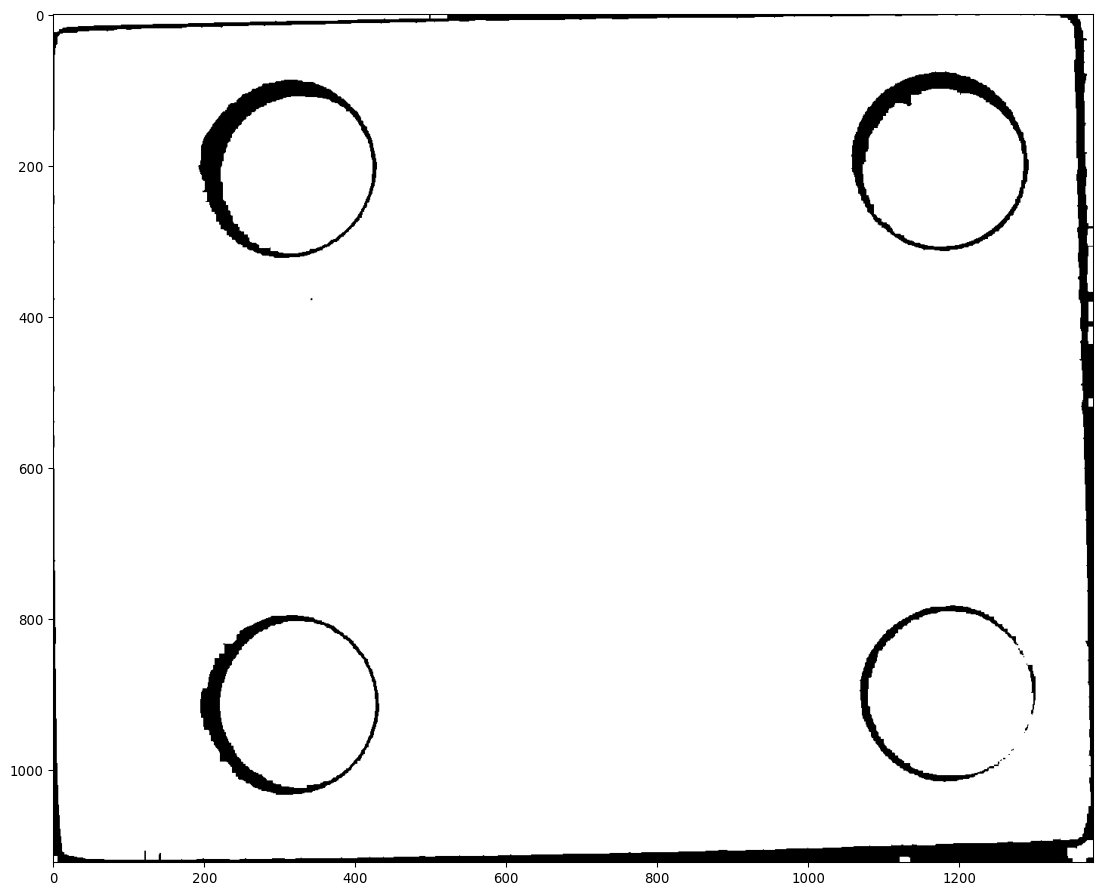

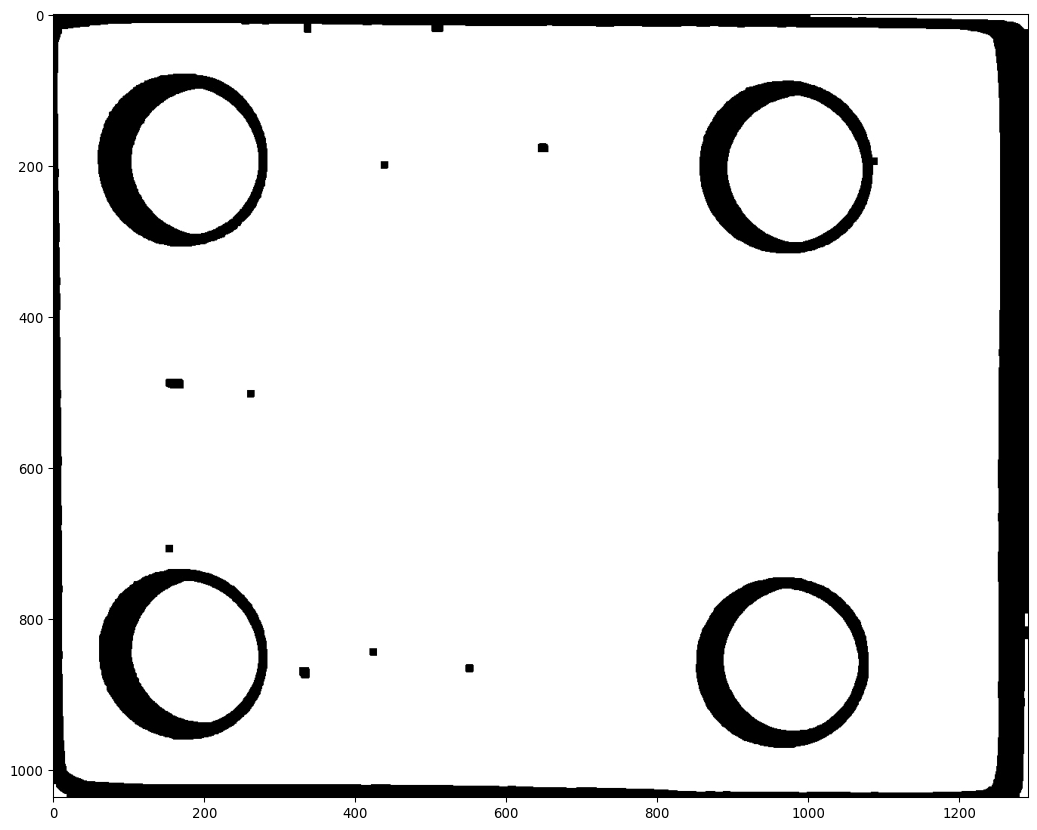

In [18]:
# Have a loook at 2 smaller images
ia.imshow(reject_images[1])
ia.imshow(reject_images[10])

#### Histogram Based Analysis

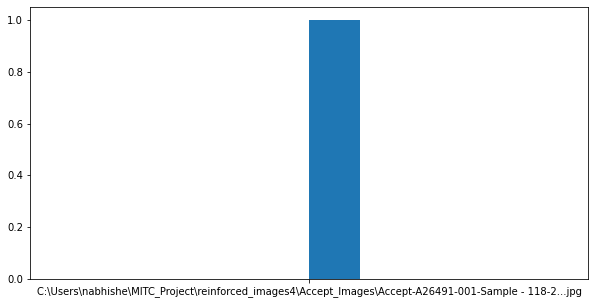

In [22]:
img_acc = 'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images4\\Accept_Images\\Accept-A26491-001-Sample - 118-2...jpg'
plt.hist(img_acc)
plt.show()

In [ ]:
img_rej = 'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images4\\Reject_Images\\Accept-A26491-001-Sample-75-2..jpg'
plt.hist(img_rej)
plt.show()

#### LabelImg

In [8]:
pip list

Package                            Version
---------------------------------- -----------------------------------------
absl-py                            0.12.0
ahk                                0.13.0
alabaster                          0.7.12
albumentations                     1.1.0
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
antlr4-python3-runtime             4.8
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astor                              0.8.1
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel             

You should consider upgrading via the 'C:\Users\nabhishe\Anaconda3\python.exe -m pip install --upgrade pip' command.


numba                              0.53.1
numexpr                            2.7.3
numpy                              1.19.3
numpydoc                           1.1.0
oauth2client                       4.1.3
oauthlib                           3.1.1
object-detection                   0.1
olefile                            0.46
omegaconf                          2.1.1
opencv-contrib-python              4.5.5.62
opencv-python                      4.5.5.62
opencv-python-headless             4.5.5.62
openpyxl                           3.0.7
opt-einsum                         3.3.0
packaging                          20.9
pandas                             1.2.4
pandocfilters                      1.4.3
paramiko                           2.7.2
parso                              0.7.0
partd                              1.2.0
patchify                           0.2.3
path                               15.1.2
pathlib2                           2.3.5
pathspec                           0.7.0
patsy   

In [9]:
LABELIMG_PATH = os.path.join('labelimg')
# C:\Users\nabhishe\MITC Project

In [10]:
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
#    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [11]:
LABELIMG_PATH

'labelimg'

In [12]:
if os.name == 'posix':
    !cd {LABELIMG_PATH} && make qt5py3
if os.name =='nt':
    !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

In [13]:
# Accept Images
!cd {LABELIMG_PATH} && python labelImg.py              **************

Cancel creation.
Image:C:\Users\nabhishe\MITC_Project\reinforced_images5\Reject_Images\Accept-A26491-001-Sample-67-1..jpg -> Annotation:C:/Users/nabhishe/MITC_Project/Accept-A26491-001-Sample-67-1..xml


In [2]:
# Accept XML Files
for index, file in enumerate(glob.glob('C:\\Users\\nabhishe\\MITC_Project\\Pixel_XML\\Accept_XML\\*.xml')):
    print(file[7:])

s\nabhishe\MITC_Project\Pixel_XML\Accept_XML\Accapted -20..xml
s\nabhishe\MITC_Project\Pixel_XML\Accept_XML\Accept-A26491-001-Sample - 116-1...xml
s\nabhishe\MITC_Project\Pixel_XML\Accept_XML\Accept-A26491-001-Sample - 118-2...xml
s\nabhishe\MITC_Project\Pixel_XML\Accept_XML\Accept-A26491-001-Sample - 120-1...xml
s\nabhishe\MITC_Project\Pixel_XML\Accept_XML\Accept-A26491-001-Sample - 121-1...xml
s\nabhishe\MITC_Project\Pixel_XML\Accept_XML\Accept-A26491-001-Sample - 121-2...xml
s\nabhishe\MITC_Project\Pixel_XML\Accept_XML\Accept-A26491-001-Sample - 123-1...xml
s\nabhishe\MITC_Project\Pixel_XML\Accept_XML\Accept-A26491-001-Sample - 124-1...xml
s\nabhishe\MITC_Project\Pixel_XML\Accept_XML\Accept-A26491-001-Sample - 124-2...xml
s\nabhishe\MITC_Project\Pixel_XML\Accept_XML\Accept-A26491-001-Sample - 125-2...xml
s\nabhishe\MITC_Project\Pixel_XML\Accept_XML\Accept-A26491-001-Sample - 44-1...xml
s\nabhishe\MITC_Project\Pixel_XML\Accept_XML\Accept-A26491-001-Sample - 52-2...xml
s\nabhishe\MITC

In [14]:
# Reject Images
!cd {LABELIMG_PATH} && python labelImg.py              **************

Image:C:\Users\nabhishe\MITC_Project\reinforced_images4\Reject_Images\Reject-A26491-001-Sample - 138-1...jpg -> Annotation:C:/Users/nabhishe/MITC_Project/Pixel_XML/Reject_XML/Reject-A26491-001-Sample - 138-1...xml
Image:C:\Users\nabhishe\MITC_Project\reinforced_images4\Reject_Images\Reject-A26491-001-Sample - 139-1...jpg -> Annotation:C:/Users/nabhishe/MITC_Project/Pixel_XML/Reject_XML/Reject-A26491-001-Sample - 139-1...xml
Image:C:\Users\nabhishe\MITC_Project\reinforced_images4\Reject_Images\Reject-A26491-001-Sample - 139-2...jpg -> Annotation:C:/Users/nabhishe/MITC_Project/Pixel_XML/Reject_XML/Reject-A26491-001-Sample - 139-2...xml
Image:C:\Users\nabhishe\MITC_Project\reinforced_images4\Reject_Images\Reject-A26491-001-Sample - 140-1...jpg -> Annotation:C:/Users/nabhishe/MITC_Project/Pixel_XML/Reject_XML/Reject-A26491-001-Sample - 140-1...xml
Image:C:\Users\nabhishe\MITC_Project\reinforced_images4\Reject_Images\Reject-A26491-001-Sample - 140-2...jpg -> Annotation:C:/Users/nabhishe/MIT

In [3]:
# Reject XML Files
for index, file in enumerate(glob.glob('C:\\Users\\nabhishe\\MITC_Project\\Pixel_XML\\Reject_XML\\*.xml')):
    print(file[7:])

s\nabhishe\MITC_Project\Pixel_XML\Reject_XML\Accept-A26491-001-Sample-108-1..xml
s\nabhishe\MITC_Project\Pixel_XML\Reject_XML\Accept-A26491-001-Sample-113-1..xml
s\nabhishe\MITC_Project\Pixel_XML\Reject_XML\Accept-A26491-001-Sample-49-1..xml
s\nabhishe\MITC_Project\Pixel_XML\Reject_XML\Accept-A26491-001-Sample-75-1..xml
s\nabhishe\MITC_Project\Pixel_XML\Reject_XML\Accept-A26491-001-Sample-75-2..xml
s\nabhishe\MITC_Project\Pixel_XML\Reject_XML\Accept-A26491-001-Sample-85-1..xml
s\nabhishe\MITC_Project\Pixel_XML\Reject_XML\Accept-A26491-001-Sample-89-1..xml
s\nabhishe\MITC_Project\Pixel_XML\Reject_XML\Reject-A26491-001-Sample - 10-1...xml
s\nabhishe\MITC_Project\Pixel_XML\Reject_XML\Reject-A26491-001-Sample - 10-2...xml
s\nabhishe\MITC_Project\Pixel_XML\Reject_XML\Reject-A26491-001-Sample - 101-1..xml
s\nabhishe\MITC_Project\Pixel_XML\Reject_XML\Reject-A26491-001-Sample - 101-2..xml
s\nabhishe\MITC_Project\Pixel_XML\Reject_XML\Reject-A26491-001-Sample - 102-2..xml
s\nabhishe\MITC_Project

#### XML to CSV

##### Accept Images

In [1027]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [1028]:
# apply xml_to_csv() function to convert all XML files in images/ folder into labels.csv

# Accept Images
accept_df = xml_to_csv('C:\\Users\\nabhishe\\MITC_Project\\Pixel_XML\\Accept_XML')
accept_df.to_csv(('hist_acc_labels.csv'), index=None)
print('Successfully converted xml to csv.')

Successfully converted xml to csv.


In [1029]:
accept_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Accapted -20..jpg,2652,2116,Accept,11,612,2604,1486
1,Accept-A26491-001-Sample - 116-1...jpg,1413,1146,Accept,18,339,1380,805
2,Accept-A26491-001-Sample - 118-2...jpg,1413,1141,Accept,19,342,1385,804
3,Accept-A26491-001-Sample - 120-1...jpg,1405,1142,Accept,16,337,1381,799
4,Accept-A26491-001-Sample - 121-1...jpg,1412,1140,Accept,22,336,1391,797


In [1030]:
accept_df.shape

(278, 8)

In [1031]:
import os

files_in_accept = sorted(os.listdir('C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Accept_Images\\'))
#files_in_annotated = sorted(os.listdir(validation_generator))

images=[i for i in files_in_accept]

accept_df1 = pd.DataFrame()
accept_df1['accept_images']=['C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Accept_Images\\'+str(x) for x in images]
accept_df1['accept_images']

accept_df1.to_csv(('hist_accept_csv.csv'), header=None)

In [1032]:
accept_df1.head()

,accept_images
0,C:\Users\nabhishe\MITC_Project\reinforced_imag...
1,C:\Users\nabhishe\MITC_Project\reinforced_imag...
2,C:\Users\nabhishe\MITC_Project\reinforced_imag...
3,C:\Users\nabhishe\MITC_Project\reinforced_imag...
4,C:\Users\nabhishe\MITC_Project\reinforced_imag...


In [1033]:
accept_df1.shape

(278, 1)

In [1034]:
acc_csv = pd.concat([accept_df1,accept_df],axis=1)
acc_csv = acc_csv.drop(columns='filename',axis=1)
acc_csv.head()

,accept_images,width,height,class,xmin,ymin,xmax,ymax
0,C:\Users\nabhishe\MITC_Project\reinforced_imag...,2652,2116,Accept,11,612,2604,1486
1,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1413,1146,Accept,18,339,1380,805
2,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1413,1141,Accept,19,342,1385,804
3,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1405,1142,Accept,16,337,1381,799
4,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1412,1140,Accept,22,336,1391,797


In [1035]:
acc_csv = acc_csv.iloc[:,[0,1,2,4,5,6,7,3]]
acc_csv.head()

,accept_images,width,height,xmin,ymin,xmax,ymax,class
0,C:\Users\nabhishe\MITC_Project\reinforced_imag...,2652,2116,11,612,2604,1486,Accept
1,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1413,1146,18,339,1380,805,Accept
2,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1413,1141,19,342,1385,804,Accept
3,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1405,1142,16,337,1381,799,Accept
4,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1412,1140,22,336,1391,797,Accept


In [1036]:
# converting to csv
acc_csv.to_csv(('hist_acc_final.csv'), header=None,index=False)

In [6]:
# Creating a Accept Cropped image Directory

CROPPED_PATH = os.path.join('cropped_hist_images','Accept_Cropped')
# C:\Users\nabhishe\MITC Project

In [7]:
if not os.path.exists(CROPPED_PATH):
    !mkdir {CROPPED_PATH}

In [8]:
project_path = 'C:\\Users\\nabhishe\\MITC_Project\\'

In [9]:
CROP_ACCEPT_CSV = project_path + "hist_acc_final.csv"

In [10]:
CROP_ACCEPT_CSV

'C:\\Users\\nabhishe\\MITC_Project\\hist_acc_final.csv'

In [11]:
import numpy as np
import csv

IMAGE_SIZE = 128                            # Image sizes can vary (128, 160, 192, 224). MobileNetV2 can also take 96

with open(CROP_ACCEPT_CSV, "r") as f:
    y_acc_crop = np.zeros((sum(1 for line in f), 4))
    X_acc_crop = []
    f.seek(0)
    data = csv.reader(f)
    for index, row in enumerate(data):
        for i, r in enumerate(row[1:7]):
            row[i+1] = int(r)
        path, image_width, image_height,x0, y0, x1, y1, _ = row       # Read image, its dimensions, BBox coords
    
        # C:\Users\nabhishe\MITC_Project\train_images\ACCEPTAccept-A26491-001-Sample-49-1.jpg
    
        path = path.split("\\")[-7] + "\\" + path.split("\\")[-6] + "\\" + path.split("\\")[-5] + "\\" + path.split("\\")[-4] + "\\" + path.split("\\")[-3] + "\\" + path.split("\\")[-2] + "\\" + path.split("\\")[-1]
        #path = path.split("\\")[-2] + "\\" + path.split("\\")[-1]
        y_acc_crop[index, 0] = x0 * IMAGE_SIZE / image_width                 # Normalize bounding box by image size
        y_acc_crop[index, 1] = y0 * IMAGE_SIZE / image_height                # Normalize bounding box by image size
        y_acc_crop[index, 2] = (x1 - x0) * IMAGE_SIZE / image_width          # Normalize bounding box by image size
        y_acc_crop[index, 3] = (y1 - y0) * IMAGE_SIZE / image_height         # Normalize bounding box by image size

        X_acc_crop.append(path)     

In [12]:
print(len(X_acc_crop))
X_acc_crop[:5]

280


['C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Accept_Images\\Accapted -20..jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Accept_Images\\Accept-A26491-001-Sample - 116-1...jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Accept_Images\\Accept-A26491-001-Sample - 118-2...jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Accept_Images\\Accept-A26491-001-Sample - 120-1...jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Accept_Images\\Accept-A26491-001-Sample - 121-1...jpg']

In [13]:
X_acc_crop[23]

'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Accept_Images\\Accept-A26491-001-Sample-100-1..jpg'

In [14]:
y_acc_crop[23]

array([  1.36170213,  39.4108252 , 125.27659574,  51.90417036])

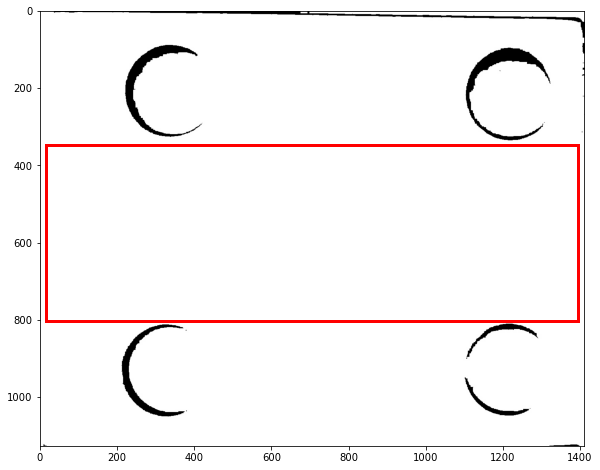

In [15]:
# Checking the Data

import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Pick a random image to check how it looks
filename = X_acc_crop[23]

unscaled = cv2.imread(filename)
region = y_acc_crop[23]
image_height, image_width, _ = unscaled.shape

x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=3, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [16]:
print(x0, y0, (x1-x0),(y1-y0))   # x, y, w, h

15 347 1380 457


In [20]:
print(len(X_acc_crop))
X_acc_crop[23]

280


'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Accept_Images\\Accept-A26491-001-Sample-100-1..jpg'

<class 'numpy.ndarray'>
Shape of the image (1127, 1410, 3)
Shape of the cropped image (457, 1380, 3)


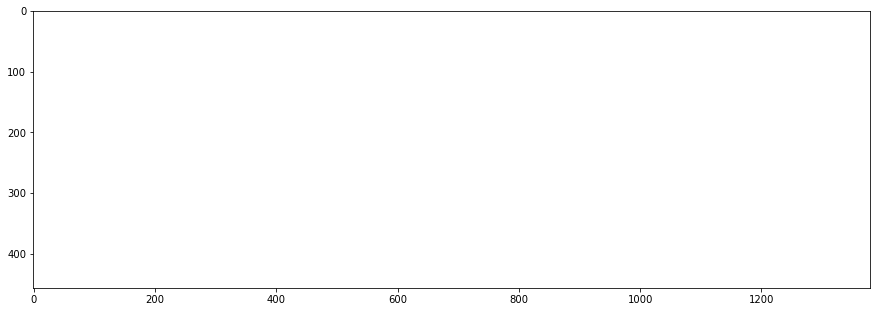

In [21]:
# Cropping a Sample Image

import cv2
  
img = cv2.imread("C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Accept_Images\\Accept-A26491-001-Sample-100-1..jpg")
print(type(img))
  
# Shape of the image
print("Shape of the image", img.shape)
# [rows, columns]
crop = img[y0:(y0+(y1-y0)), x0:(x0+(x1 - x0))]    # 460 314 1376 1107     img[y:y+h, x:x+w]

  
plt.imshow(crop)

print("Shape of the cropped image", crop.shape)

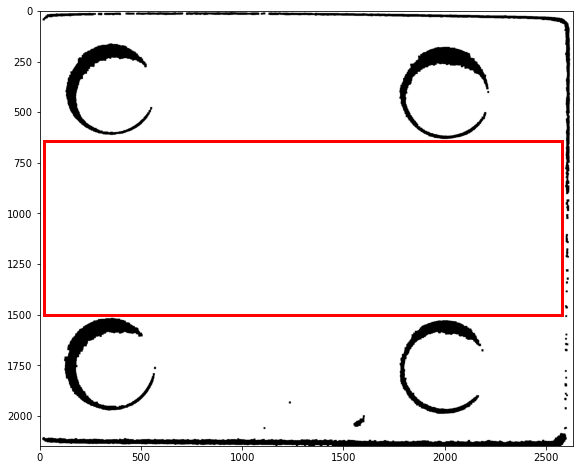

In [1175]:
# Cropping all the Images in Hist Accept

import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Pick a random image to check how it looks
filename = X_acc_crop[279]

unscaled = cv2.imread(filename)
region = y_acc_crop[279]
image_height, image_width, _ = unscaled.shape

x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=3, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()


In [1171]:
X_acc_crop[279]

'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Accept_Images\\Rejected -2..jpg'

<class 'numpy.ndarray'>
Shape of the image (2148, 2632, 3)
Shape of the cropped image (857, 2557, 3)


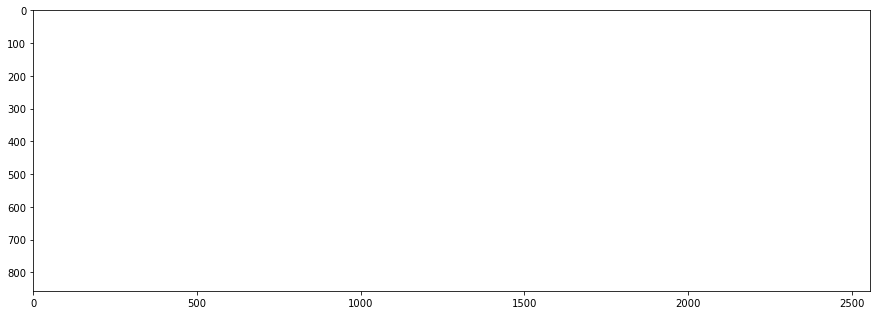

In [1172]:
import cv2
  
img = cv2.imread('C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Accept_Images\\Rejected -2..jpg')
print(type(img))
  
# Shape of the image
print("Shape of the image", img.shape)
# [rows, columns]
crop = img[y0:(y0+(y1-y0)), x0:(x0+(x1 - x0))]    # 460 314 1376 1107     img[y:y+h, x:x+w]
  
plt.imshow(crop)

print("Shape of the cropped image", crop.shape)

In [26]:
result=cv2.imwrite('C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Accept_cropped\\Accept-A26491-001-Sample-49-1..jpg', crop)
if result==True:
    print('File saved successfully')
else:
    print('Error in saving file')

File saved successfully


##### Reject Images

In [1037]:
# apply xml_to_csv() function to convert all XML files in images/ folder into labels.csv

# Reject Images
reject_df = xml_to_csv('C:\\Users\\nabhishe\\MITC_Project\\Pixel_XML\\Reject_XML\\')
reject_df.to_csv(('hist_reject_labels.csv'), index=None)
print('Successfully converted xml to csv.')

Successfully converted xml to csv.


In [1038]:
reject_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Accept-A26491-001-Sample-105-1..jpg,1383,1113,Accept,18,334,1349,782
1,Accept-A26491-001-Sample-108-1..jpg,1377,1123,Reject,12,331,1345,774
2,Accept-A26491-001-Sample-113-1..jpg,1382,1104,Reject,23,331,1354,778
3,Accept-A26491-001-Sample-49-1..jpg,1405,1142,Reject,14,342,1379,799
4,Accept-A26491-001-Sample-67-1..jpg,1304,1053,Accept,23,312,1277,737


In [1039]:
reject_df.shape

(242, 8)

In [1040]:
import os

files_in_accept = sorted(os.listdir('C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Reject_Images\\'))

# C:\Users\nabhishe\MITC_Project\train_images\REJECT
#files_in_annotated = sorted(os.listdir(validation_generator))

images=[i for i in files_in_accept]

reject_df1 = pd.DataFrame()
reject_df1['reject_images']=['C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Reject_Images\\'+str(x) for x in images]
reject_df1['reject_images']

reject_df1.to_csv(('hist_reject_csv.csv'), header=None)

In [1041]:
reject_df1.head()

,reject_images
0,C:\Users\nabhishe\MITC_Project\reinforced_imag...
1,C:\Users\nabhishe\MITC_Project\reinforced_imag...
2,C:\Users\nabhishe\MITC_Project\reinforced_imag...
3,C:\Users\nabhishe\MITC_Project\reinforced_imag...
4,C:\Users\nabhishe\MITC_Project\reinforced_imag...


In [1042]:
reject_df1.shape

(242, 1)

In [1043]:
reject_csv = pd.concat([reject_df1,reject_df],axis=1)
reject_csv = reject_csv.drop(columns='filename',axis=1)
reject_csv.head()

,reject_images,width,height,class,xmin,ymin,xmax,ymax
0,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1383,1113,Accept,18,334,1349,782
1,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1377,1123,Reject,12,331,1345,774
2,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1382,1104,Reject,23,331,1354,778
3,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1405,1142,Reject,14,342,1379,799
4,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1304,1053,Accept,23,312,1277,737


In [1044]:
reject_csv = reject_csv.iloc[:,[0,1,2,4,5,6,7,3]]
reject_csv.head()

,reject_images,width,height,xmin,ymin,xmax,ymax,class
0,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1383,1113,18,334,1349,782,Accept
1,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1377,1123,12,331,1345,774,Reject
2,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1382,1104,23,331,1354,778,Reject
3,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1405,1142,14,342,1379,799,Reject
4,C:\Users\nabhishe\MITC_Project\reinforced_imag...,1304,1053,23,312,1277,737,Accept


In [1045]:
# converting to csv
reject_csv.to_csv(('hist_reject_final.csv'), header=None,index=False)

In [6]:
# Creating a Reject Cropped image Directory

CROPPED_PATH = os.path.join('cropped_hist_images','Reject_Cropped')
# C:\Users\nabhishe\MITC Project

In [7]:
if not os.path.exists(CROPPED_PATH):
    !mkdir {CROPPED_PATH}

In [8]:
project_path = 'C:\\Users\\nabhishe\\MITC_Project\\'

In [9]:
CROP_REJECT_CSV = project_path + "hist_reject_final.csv"

In [10]:
CROP_REJECT_CSV

'C:\\Users\\nabhishe\\MITC_Project\\hist_reject_final.csv'

In [11]:
import numpy as np
import csv

IMAGE_SIZE = 128                            # Image sizes can vary (128, 160, 192, 224). MobileNetV2 can also take 96

with open(CROP_REJECT_CSV, "r") as f:
    y_rej_crop = np.zeros((sum(1 for line in f), 4))
    X_rej_crop = []
    f.seek(0)
    data = csv.reader(f)
    for index, row in enumerate(data):
        for i, r in enumerate(row[1:7]):
            row[i+1] = int(r)
        path, image_width, image_height,x0, y0, x1, y1, _ = row       # Read image, its dimensions, BBox coords
    
        # C:\Users\nabhishe\MITC_Project\train_images\ACCEPTAccept-A26491-001-Sample-49-1.jpg
    
        path = path.split("\\")[-7] + "\\" + path.split("\\")[-6] + "\\" + path.split("\\")[-5] + "\\" + path.split("\\")[-4] + "\\" + path.split("\\")[-3] + "\\" + path.split("\\")[-2] + "\\" + path.split("\\")[-1]
        #path = path.split("\\")[-2] + "\\" + path.split("\\")[-1]
        y_rej_crop[index, 0] = x0 * IMAGE_SIZE / image_width                 # Normalize bounding box by image size
        y_rej_crop[index, 1] = y0 * IMAGE_SIZE / image_height                # Normalize bounding box by image size
        y_rej_crop[index, 2] = (x1 - x0) * IMAGE_SIZE / image_width          # Normalize bounding box by image size
        y_rej_crop[index, 3] = (y1 - y0) * IMAGE_SIZE / image_height         # Normalize bounding box by image size

        X_rej_crop.append(path)     

In [12]:
print(len(X_rej_crop))
X_rej_crop[:5]

240


['C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Reject_Images\\Accept-A26491-001-Sample-108-1..jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Reject_Images\\Accept-A26491-001-Sample-113-1..jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Reject_Images\\Accept-A26491-001-Sample-49-1..jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Reject_Images\\Accept-A26491-001-Sample-75-1..jpg',
 'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Reject_Images\\Accept-A26491-001-Sample-75-2..jpg']

In [13]:
X_rej_crop[23]

'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Reject_Images\\Reject-A26491-001-Sample - 115-1..jpg'

In [14]:
y_rej_crop[23]

array([  1.80918728,  38.08450704, 123.11519435,  50.70422535])

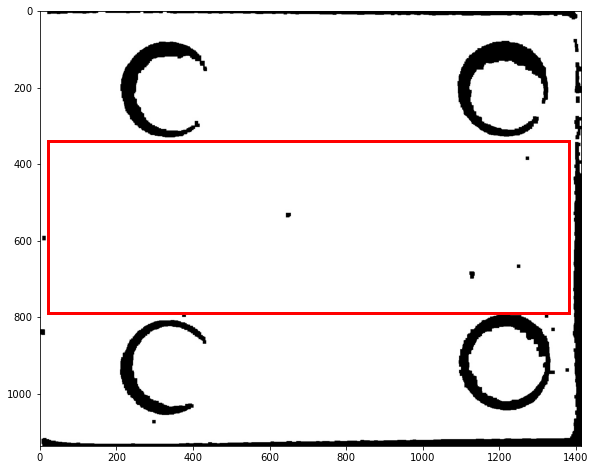

In [15]:
# Checking the Data

import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Pick a random image to check how it looks
filename = X_rej_crop[23]

unscaled = cv2.imread(filename)
region = y_rej_crop[23]
image_height, image_width, _ = unscaled.shape

x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=3, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [16]:
print(x0, y0, (x1-x0),(y1-y0))   # x, y, w, h

20 338 1361 450


In [17]:
print(len(X_rej_crop))
X_rej_crop[23]

240


'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Reject_Images\\Reject-A26491-001-Sample - 115-1..jpg'

<class 'numpy.ndarray'>
Shape of the image (1136, 1415, 3)
Shape of the cropped image (450, 1361, 3)


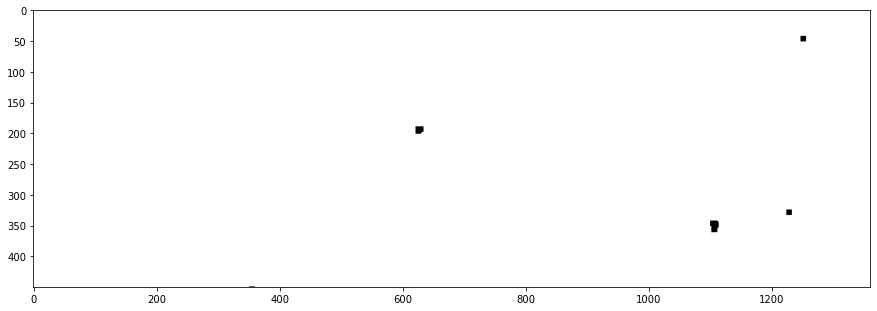

In [18]:
# Cropping a Sample Image

import cv2
  
img = cv2.imread("C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Reject_Images\\Reject-A26491-001-Sample - 115-1..jpg")
print(type(img))
  
# Shape of the image
print("Shape of the image", img.shape)
# [rows, columns]
crop = img[y0:(y0+(y1-y0)), x0:(x0+(x1 - x0))]    # 460 314 1376 1107     img[y:y+h, x:x+w]

  
plt.imshow(crop)

print("Shape of the cropped image", crop.shape)

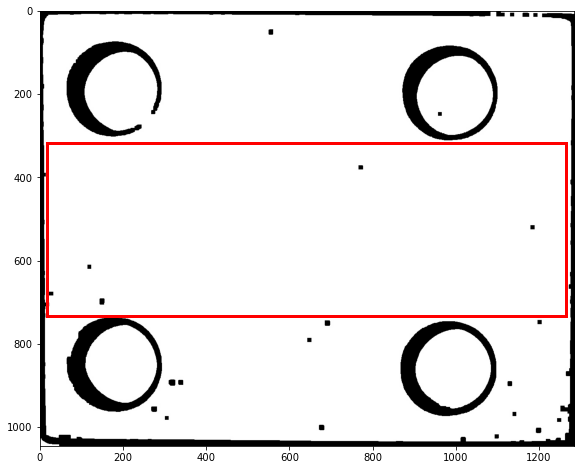

In [1014]:
# Cropping all the Images in Hist Accept

import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Pick a random image to check how it looks
filename = X_rej_crop[49]

unscaled = cv2.imread(filename)
region = y_rej_crop[49]
image_height, image_width, _ = unscaled.shape

x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=3, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()


In [1015]:
X_rej_crop[49]

'C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Reject_Images\\Reject-A26491-001-Sample - 137-2...jpg'

<class 'numpy.ndarray'>
Shape of the image (1046, 1285, 3)
Shape of the cropped image (417, 1249, 3)


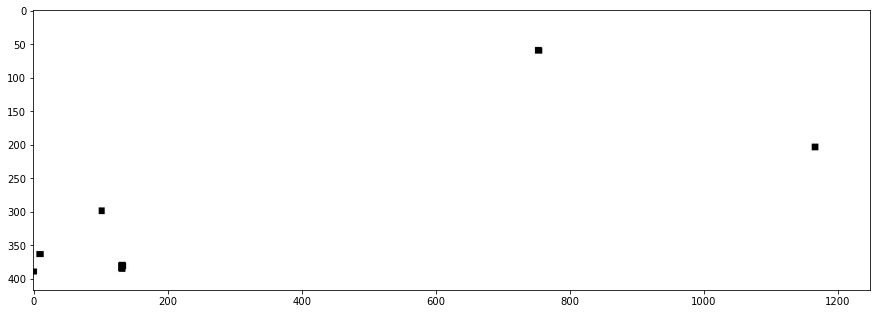

In [1016]:
import cv2
  
img = cv2.imread('C:\\Users\\nabhishe\\MITC_Project\\reinforced_images5\\Reject_Images\\Reject-A26491-001-Sample - 137-2...jpg')
print(type(img))
  
# Shape of the imageReject-A26491-001-Sample - 146-2...jpg
print("Shape of the image", img.shape)
# [rows, columns]
crop = img[y0:(y0+(y1-y0)), x0:(x0+(x1 - x0))]    # 460 314 1376 1107     img[y:y+h, x:x+w]
  
plt.imshow(crop)

print("Shape of the cropped image", crop.shape)

In [1017]:
result=cv2.imwrite('C:\\Users\\nabhishe\\MITC_Project\\cropped_hist_images\\Reject_cropped\\Reject-A26491-001-Sample - 137-2...jpg', crop)
if result==True:
    print('File saved successfully')
else:
    print('Error in saving file')

File saved successfully
